In [1]:
import pandas as pd
import seaborn as sns

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_raw = df_train.copy
df_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
df_train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [5]:
df_train.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [6]:
df_train.drop('Cabin',axis =1, inplace=True)
df_test.drop('Cabin',axis =1, inplace=True)
df_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

In [7]:
df_train.drop('PassengerId',axis =1, inplace=True)
df_test.drop('PassengerId',axis =1, inplace=True)

df_train.head()

Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Embarked  
0    male  22.0      1      0         A/5 21171   7.2500        S  
1  female  38.0      1      0          PC 17599  71.2833        C  
2  female  26.0      0      0  STON/O2. 3101282   7.9250        S  
3  female  35.0      1      0            113803  53.1000        S  
4    male  35.0      0      0            373450   8.0500        S

In [8]:
def name_split(row):
    try: return row.split(",")[0]
    except:return None

In [9]:
df_train["surname"] = df_train["Name"].apply(lambda x: name_split(x))
df_test["surname"] = df_test["Name"].apply(lambda x: name_split(x))
df_train.head()

Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Embarked    surname  
0    male  22.0      1      0         A/5 21171   7.2500        S     Braund  
1  female  38.0      1      0          PC 17599  71.2833        C    Cumings  
2  female  26.0      0      0  STON/O2. 3101282   7.9250        S  Heikkinen  
3  female  35.0      1      0            113803  53.1000        S   Futrelle  
4    male  35.0      0      0            373450   8.0500        S      Allen

In [10]:
df_test.head()

Pclass                                          Name     Sex   Age  SibSp  \
0       3                              Kelly, Mr. James    male  34.5      0   
1       3              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   
2       2                     Myles, Mr. Thomas Francis    male  62.0      0   
3       3                              Wirz, Mr. Albert    male  27.0      0   
4       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1   

   Parch   Ticket     Fare Embarked   surname  
0      0   330911   7.8292        Q     Kelly  
1      0   363272   7.0000        S    Wilkes  
2      0   240276   9.6875        Q     Myles  
3      0   315154   8.6625        S      Wirz  
4      1  3101298  12.2875        S  Hirvonen

In [11]:
df_train["title"] = df_train["Name"].apply(lambda x: x.split(",")[1].split(".")[0])
df_test["title"] = df_test["Name"].apply(lambda x: x.split(",")[1].split(".")[0])

df_train.head()

Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Embarked    surname  \
0    male  22.0      1      0         A/5 21171   7.2500        S     Braund   
1  female  38.0      1      0          PC 17599  71.2833        C    Cumings   
2  female  26.0      0      0  STON/O2. 3101282   7.9250        S  Heikkinen   
3  female  35.0      1      0            113803  53.1000        S   Futrelle   
4    male  35.0      0      0            373450   8.0500        S      Allen   

   title  
0     Mr  
1    Mrs  
2   Miss  
3    Mrs  
4     Mr

In [12]:
df_train.surname.value_counts()

Andersson           9
Sage                7
Carter              6
Skoog               6
Johnson             6
Goodwin             6
Panula              6
Rice                5
Harris              4
Hart                4
Palsson             4
Lefebre             4
Harper              4
Smith               4
Brown               4
Williams            4
Kelly               4
Asplund             4
Gustafsson          4
Ford                4
Fortune             4
Baclini             4
Boulos              3
Jussila             3
Jensen              3
Richards            3
Allison             3
Olsen               3
Hansen              3
Newell              3
                   ..
Sutehall            1
Fahlstrom           1
Kallio              1
Alhomaki            1
Masselmani          1
Rouse               1
Astor               1
Lesurer             1
Stahelin-Maeglin    1
Wiklund             1
Chaffee             1
Saundercock         1
Pasic               1
Adams               1
Peters    

In [13]:
df_train[df_train["surname"]=="Sage"]

Survived  Pclass                               Name     Sex  Age  SibSp  \
159         0       3         Sage, Master. Thomas Henry    male  NaN      8   
180         0       3       Sage, Miss. Constance Gladys  female  NaN      8   
201         0       3                Sage, Mr. Frederick    male  NaN      8   
324         0       3           Sage, Mr. George John Jr    male  NaN      8   
792         0       3            Sage, Miss. Stella Anna  female  NaN      8   
846         0       3           Sage, Mr. Douglas Bullen    male  NaN      8   
863         0       3  Sage, Miss. Dorothy Edith "Dolly"  female  NaN      8   

     Parch    Ticket   Fare Embarked surname    title  
159      2  CA. 2343  69.55        S    Sage   Master  
180      2  CA. 2343  69.55        S    Sage     Miss  
201      2  CA. 2343  69.55        S    Sage       Mr  
324      2  CA. 2343  69.55        S    Sage       Mr  
792      2  CA. 2343  69.55        S    Sage     Miss  
846      2  CA. 2343  69.55        S    Sage       Mr  
863      2  CA. 2343  69.55        S    Sage     Miss

In [14]:
df_train[df_train["surname"]=="Fortune"]

Survived  Pclass                            Name     Sex   Age  SibSp  \
27          0       1  Fortune, Mr. Charles Alexander    male  19.0      3   
88          1       1      Fortune, Miss. Mabel Helen  female  23.0      3   
341         1       1  Fortune, Miss. Alice Elizabeth  female  24.0      3   
438         0       1               Fortune, Mr. Mark    male  64.0      1   

     Parch Ticket   Fare Embarked  surname  title  
27       2  19950  263.0        S  Fortune     Mr  
88       2  19950  263.0        S  Fortune   Miss  
341      2  19950  263.0        S  Fortune   Miss  
438      4  19950  263.0        S  Fortune     Mr

In [15]:
#df_train[df_train["Cabin"]=="C23 C25 C27"]

In [16]:
df_train[df_train["surname"]=="Panula"]

Survived  Pclass                                    Name     Sex   Age  \
50          0       3              Panula, Master. Juha Niilo    male   7.0   
164         0       3            Panula, Master. Eino Viljami    male   1.0   
266         0       3               Panula, Mr. Ernesti Arvid    male  16.0   
638         0       3  Panula, Mrs. Juha (Maria Emilia Ojala)  female  41.0   
686         0       3                Panula, Mr. Jaako Arnold    male  14.0   
824         0       3            Panula, Master. Urho Abraham    male   2.0   

     SibSp  Parch   Ticket     Fare Embarked surname    title  
50       4      1  3101295  39.6875        S  Panula   Master  
164      4      1  3101295  39.6875        S  Panula   Master  
266      4      1  3101295  39.6875        S  Panula       Mr  
638      0      5  3101295  39.6875        S  Panula      Mrs  
686      4      1  3101295  39.6875        S  Panula       Mr  
824      4      1  3101295  39.6875        S  Panula   Master

* parch = # of parents / children aboard the Titanic
* sibsp = # of siblings / spouses aboard the Titanic

>sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

>parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [17]:
df_train.drop('Ticket',axis =1, inplace=True)
df_train.drop('Name',axis =1, inplace=True)
df_test.drop('Ticket',axis =1, inplace=True)
df_test.drop('Name',axis =1, inplace=True)



df_train.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked    surname  \
0         0       3    male  22.0      1      0   7.2500        S     Braund   
1         1       1  female  38.0      1      0  71.2833        C    Cumings   
2         1       3  female  26.0      0      0   7.9250        S  Heikkinen   
3         1       1  female  35.0      1      0  53.1000        S   Futrelle   
4         0       3    male  35.0      0      0   8.0500        S      Allen   

   title  
0     Mr  
1    Mrs  
2   Miss  
3    Mrs  
4     Mr

In [18]:
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
surname       0
title         0
dtype: int64

In [19]:
df_train[df_train["Embarked"].isnull()].index.tolist()

[61, 829]

In [20]:
df_train.loc[61]

Survived         1
Pclass           1
Sex         female
Age             38
SibSp            0
Parch            0
Fare            80
Embarked       NaN
surname      Icard
title         Miss
Name: 61, dtype: object

In [21]:
df_train.loc[829]

Survived         1
Pclass           1
Sex         female
Age             62
SibSp            0
Parch            0
Fare            80
Embarked       NaN
surname      Stone
title          Mrs
Name: 829, dtype: object

From which port fare was about 80? Barchart sns

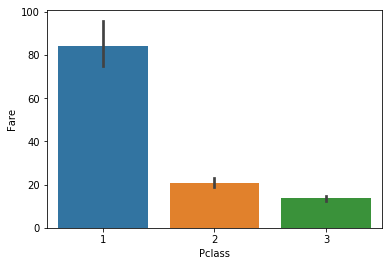

In [22]:
sns.barplot(df_train["Pclass"],df_train["Fare"])

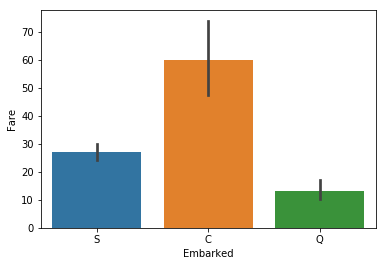

In [23]:
sns.barplot(df_train["Embarked"],df_train["Fare"])

DataFrame.set_value(index, col, value, takeable=False)

In [24]:
df_train.describe()

Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

In [25]:
df_test[df_test["Fare"].isnull()].index.tolist()

[152]

In [26]:
df_test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
surname      0
title        0
dtype: int64

In [27]:
df_test.loc[152]

Pclass           3
Sex           male
Age           60.5
SibSp            0
Parch            0
Fare           NaN
Embarked         S
surname     Storey
title           Mr
Name: 152, dtype: object

In [28]:
df_test.set_value(152,"Fare","60")


/home/michal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.


Pclass     Sex   Age  SibSp  Parch      Fare Embarked           surname  \
0         3    male  34.5      0      0    7.8292        Q             Kelly   
1         3  female  47.0      1      0    7.0000        S            Wilkes   
2         2    male  62.0      0      0    9.6875        Q             Myles   
3         3    male  27.0      0      0    8.6625        S              Wirz   
4         3  female  22.0      1      1   12.2875        S          Hirvonen   
5         3    male  14.0      0      0    9.2250        S          Svensson   
6         3  female  30.0      0      0    7.6292        Q          Connolly   
7         2    male  26.0      1      1   29.0000        S          Caldwell   
8         3  female  18.0      0      0    7.2292        C           Abrahim   
9         3    male  21.0      2      0   24.1500        S            Davies   
10        3    male   NaN      0      0    7.8958        S            Ilieff   
11        1    male  46.0      0      0   26.0000        S             Jones   
12        1  female  23.0      1      0   82.2667        S            Snyder   
13        2    male  63.0      1      0   26.0000        S            Howard   
14        1  female  47.0      1      0   61.1750        S           Chaffee   
15        2  female  24.0      1      0   27.7208        C         del Carlo   
16        2    male  35.0      0      0   12.3500        Q             Keane   
17        3    male  21.0      0      0    7.2250        C             Assaf   
18        3  female  27.0      1      0    7.9250        S        Ilmakangas   
19        3  female  45.0      0      0    7.2250        C      Assaf Khalil   
20        1    male  55.0      1      0   59.4000        C        Rothschild   
21        3    male   9.0      0      1    3.1708        S             Olsen   
22        1  female   NaN      0      0   31.6833        S        Flegenheim   
23        1    male  21.0      0      1   61.3792        C          Williams   
24        1  female  48.0      1      3  262.3750        C           Ryerson   
25        3    male  50.0      1      0   14.5000        S            Robins   
26        1  female  22.0      0      1   61.9792        C             Ostby   
27        3    male  22.5      0      0    7.2250        C             Daher   
28        1    male  41.0      0      0   30.5000        S             Brady   
29        3    male   NaN      2      0   21.6792        C            Samaan   
..      ...     ...   ...    ...    ...       ...      ...               ...   
388       3    male  21.0      0      0    7.7500        Q           Canavan   
389       3    male   6.0      3      1   21.0750        S           Palsson   
390       1    male  23.0      0      0   93.5000        S             Payne   
391       1  female  51.0      0      1   39.4000        S             Lines   
392       3    male  13.0      0      2   20.2500        S            Abbott   
393       2    male  47.0      0      0   10.5000        S           Gilbert   
394       3    male  29.0      3      1   22.0250        S     Kink-Heilmann   
395       1  female  18.0      1      0   60.0000        S             Smith   
396       3    male  24.0      0      0    7.2500        Q           Colbert   
397       1  female  48.0      1      1   79.2000        C  Frolicher-Stehli   
398       3    male  22.0      0      0    7.7750        S  Larsson-Rondberg   
399       3    male  31.0      0      0    7.7333        Q            Conlon   
400       1  female  30.0      0      0  164.8667        S           Bonnell   
401       2    male  38.0      1      0   21.0000        S              Gale   
402       1  female  22.0      0      1   59.4000        C            Gibson   
403       1    male  17.0      0      0   47.1000        S            Carrau   
404       1    male  43.0      1      0   27.7208        C        Frauenthal   
405       2    male  20.0      0      0   13.8625        C           Nourney   
406  

In [29]:
df_train.set_value(61,"Embarked","C")
df_train.set_value(829,"Embarked","C")
df_train.isnull().sum()

/home/michal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.
/home/michal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
surname       0
title         0
dtype: int64

In [30]:
df_test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         0
Embarked     0
surname      0
title        0
dtype: int64

In [31]:
df_train.describe()

Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

In [32]:
df_train.loc[df_train["Age"].isnull()]

Survived  Pclass     Sex  Age  SibSp  Parch      Fare Embarked  \
5           0       3    male  NaN      0      0    8.4583        Q   
17          1       2    male  NaN      0      0   13.0000        S   
19          1       3  female  NaN      0      0    7.2250        C   
26          0       3    male  NaN      0      0    7.2250        C   
28          1       3  female  NaN      0      0    7.8792        Q   
29          0       3    male  NaN      0      0    7.8958        S   
31          1       1  female  NaN      1      0  146.5208        C   
32          1       3  female  NaN      0      0    7.7500        Q   
36          1       3    male  NaN      0      0    7.2292        C   
42          0       3    male  NaN      0      0    7.8958        C   
45          0       3    male  NaN      0      0    8.0500        S   
46          0       3    male  NaN      1      0   15.5000        Q   
47          1       3  female  NaN      0      0    7.7500        Q   
48          0       3    male  NaN      2      0   21.6792        C   
55          1       1    male  NaN      0      0   35.5000        S   
64          0       1    male  NaN      0      0   27.7208        C   
65          1       3    male  NaN      1      1   15.2458        C   
76          0       3    male  NaN      0      0    7.8958        S   
77          0       3    male  NaN      0      0    8.0500        S   
82          1       3  female  NaN      0      0    7.7875        Q   
87          0       3    male  NaN      0      0    8.0500        S   
95          0       3    male  NaN      0      0    8.0500        S   
101         0       3    male  NaN      0      0    7.8958        S   
107         1       3    male  NaN      0      0    7.7750        S   
109         1       3  female  NaN      1      0   24.1500        Q   
121         0       3    male  NaN      0      0    8.0500        S   
126         0       3    male  NaN      0      0    7.7500        Q   
128         1       3  female  NaN      1      1   22.3583        C   
140         0       3  female  NaN      0      2   15.2458        C   
154         0       3    male  NaN      0      0    7.3125        S   
..        ...     ...     ...  ...    ...    ...       ...      ...   
718         0       3    male  NaN      0      0   15.5000        Q   
727         1       3  female  NaN      0      0    7.7375        Q   
732         0       2    male  NaN      0      0    0.0000        S   
738         0       3    male  NaN      0      0    7.8958        S   
739         0       3    male  NaN      0      0    7.8958        S   
740         1       1    male  NaN      0      0   30.0000        S   
760         0       3    male  NaN      0      0   14.5000        S   
766         0       1    male  NaN      0      0   39.6000        C   
768         0       3    male  NaN      1      0   24.1500        Q   
773         0       3    male  NaN      0      0    7.2250        C   
776         0       3    male  NaN      0      0    7.7500        Q   
778         0       3    male  NaN      0      0    7.7375        Q   
783         0       3    male  NaN      1      2   23.4500        S   
790         0       3    male  NaN      0      0    7.7500        Q   
792         0       3  female  NaN      8      2   69.5500        S   
793         0       1    male  NaN      0      0   30.6958        C   
815         0       1    male  NaN      0      0    0.0000        S   
825         0       3    male  NaN      0      0    6.9500        Q   
826         0       3    male  NaN      0      0   56.4958        S   
828         1       3    male  NaN      0      0    7.7500        Q   
832         0       3    male  NaN      0      0    7.2292        C   
837         0       3    male  NaN      0      0    8.0500        S   
839         1       1    male  NaN      0      0   29.7000        C   
846         0       3    male  NaN      8      2   69.5500        S   
849         1       1  female

In [33]:
df_train["Age"] = df_train["Age"].fillna(df_train["Age"].mean())
df_test["Age"] = df_test["Age"].fillna(df_test["Age"].mean())

In [34]:
df_train.describe()

Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   13.002015    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   22.000000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   29.699118    0.000000    0.000000   14.454200
75%      1.000000    3.000000   35.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

class pandas.Categorical(values, categories=None, ordered=None, dtype=None, fastpath=False)

In [35]:
df_train['Sex'] = pd.Categorical(df_train["Sex"])
df_train['Embarked'] = pd.Categorical(df_train["Embarked"])
df_train['Pclass'] = pd.Categorical(df_train["Pclass"])

df_test['Sex'] = pd.Categorical(df_test["Sex"])
df_test['Embarked'] = pd.Categorical(df_test["Embarked"])
df_test['Pclass'] = pd.Categorical(df_test["Pclass"])

pandas.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False)

In [36]:
#df_train = pd.get_dummies(df_train["Embarked"], drop_first=True)
df_train.head()

Survived Pclass     Sex   Age  SibSp  Parch     Fare Embarked    surname  \
0         0      3    male  22.0      1      0   7.2500        S     Braund   
1         1      1  female  38.0      1      0  71.2833        C    Cumings   
2         1      3  female  26.0      0      0   7.9250        S  Heikkinen   
3         1      1  female  35.0      1      0  53.1000        S   Futrelle   
4         0      3    male  35.0      0      0   8.0500        S      Allen   

   title  
0     Mr  
1    Mrs  
2   Miss  
3    Mrs  
4     Mr

In [37]:
df_train.columns.tolist()

['Survived',
 'Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked',
 'surname',
 'title']

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

/home/michal/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [39]:
df_train.head()

Survived Pclass     Sex   Age  SibSp  Parch     Fare Embarked    surname  \
0         0      3    male  22.0      1      0   7.2500        S     Braund   
1         1      1  female  38.0      1      0  71.2833        C    Cumings   
2         1      3  female  26.0      0      0   7.9250        S  Heikkinen   
3         1      1  female  35.0      1      0  53.1000        S   Futrelle   
4         0      3    male  35.0      0      0   8.0500        S      Allen   

   title  
0     Mr  
1    Mrs  
2   Miss  
3    Mrs  
4     Mr

In [40]:
logreg = LogisticRegression()

In [41]:
y = df_train.Survived.copy() 

In [42]:
df_train = df_train.drop("Survived", axis=1)

In [43]:
X = df_train

In [44]:
X.head()

Pclass     Sex   Age  SibSp  Parch     Fare Embarked    surname  title
0      3    male  22.0      1      0   7.2500        S     Braund     Mr
1      1  female  38.0      1      0  71.2833        C    Cumings    Mrs
2      3  female  26.0      0      0   7.9250        S  Heikkinen   Miss
3      1  female  35.0      1      0  53.1000        S   Futrelle    Mrs
4      3    male  35.0      0      0   8.0500        S      Allen     Mr

In [45]:
X.dropna()

Pclass     Sex        Age  SibSp  Parch      Fare Embarked  \
0        3    male  22.000000      1      0    7.2500        S   
1        1  female  38.000000      1      0   71.2833        C   
2        3  female  26.000000      0      0    7.9250        S   
3        1  female  35.000000      1      0   53.1000        S   
4        3    male  35.000000      0      0    8.0500        S   
5        3    male  29.699118      0      0    8.4583        Q   
6        1    male  54.000000      0      0   51.8625        S   
7        3    male   2.000000      3      1   21.0750        S   
8        3  female  27.000000      0      2   11.1333        S   
9        2  female  14.000000      1      0   30.0708        C   
10       3  female   4.000000      1      1   16.7000        S   
11       1  female  58.000000      0      0   26.5500        S   
12       3    male  20.000000      0      0    8.0500        S   
13       3    male  39.000000      1      5   31.2750        S   
14       3  female  14.000000      0      0    7.8542        S   
15       2  female  55.000000      0      0   16.0000        S   
16       3    male   2.000000      4      1   29.1250        Q   
17       2    male  29.699118      0      0   13.0000        S   
18       3  female  31.000000      1      0   18.0000        S   
19       3  female  29.699118      0      0    7.2250        C   
20       2    male  35.000000      0      0   26.0000        S   
21       2    male  34.000000      0      0   13.0000        S   
22       3  female  15.000000      0      0    8.0292        Q   
23       1    male  28.000000      0      0   35.5000        S   
24       3  female   8.000000      3      1   21.0750        S   
25       3  female  38.000000      1      5   31.3875        S   
26       3    male  29.699118      0      0    7.2250        C   
27       1    male  19.000000      3      2  263.0000        S   
28       3  female  29.699118      0      0    7.8792        Q   
29       3    male  29.699118      0      0    7.8958        S   
..     ...     ...        ...    ...    ...       ...      ...   
861      2    male  21.000000      1      0   11.5000        S   
862      1  female  48.000000      0      0   25.9292        S   
863      3  female  29.699118      8      2   69.5500        S   
864      2    male  24.000000      0      0   13.0000        S   
865      2  female  42.000000      0      0   13.0000        S   
866      2  female  27.000000      1      0   13.8583        C   
867      1    male  31.000000      0      0   50.4958        S   
868      3    male  29.699118      0      0    9.5000        S   
869      3    male   4.000000      1      1   11.1333        S   
870      3    male  26.000000      0      0    7.8958        S   
871      1  female  47.000000      1      1   52.5542        S   
872      1    male  33.000000      0      0    5.0000        S   
873      3    male  47.000000      0      0    9.0000        S   
874      2  female  28.000000      1      0   24.0000        C   
875      3  female  15.000000      0      0    7.2250        C   
876      3    male  20.000000      0      0    9.8458        S   
877      3    male  19.000000      0      0    7.8958        S   
878      3    male  29.699118      0      0    7.8958        S   
879      1  female  56.000000      0      1   83.1583        C   
880      2  female  25.000000      0      1   26.0000        S   
881      3    male  33.000000      0      0    7.8958        S   
882      3  female  22.000000      0      0   10.5167        S   
883      2    male  28.000000      0      0   10.5000        S   
884      3    male  25.000000      0      0    7.0500        S   
885      3  female  39.000000      0      5   29.1250        Q   
886      2    male  27.000000      0      0   13.0000        S   
887      1  female  19.000000      0      0   30.0000        S   
888      3  female  29.699118      1      2   23.4500        S   
889      1    male  26.000000      0      0 

In [46]:
df = pd.concat([df_train,pd.get_dummies(df_train.title)], axis = 1)
df = pd.concat([df,pd.get_dummies(df.Embarked)], axis = 1)
df = pd.concat([df,pd.get_dummies(df.Sex)], axis = 1)
df = pd.concat([df,pd.get_dummies(df.Pclass)], axis = 1)
df = df.drop("Embarked",axis = 1)
df= df.drop("title",axis = 1)
df =df.drop("surname",axis = 1)
df = df.drop("Sex", axis = 1)
df = df.drop("Pclass", axis = 1)

In [47]:
df.head()

Age  SibSp  Parch     Fare   Capt   Col   Don   Dr   Jonkheer   Lady ...  \
0  22.0      1      0   7.2500      0     0     0    0          0      0 ...   
1  38.0      1      0  71.2833      0     0     0    0          0      0 ...   
2  26.0      0      0   7.9250      0     0     0    0          0      0 ...   
3  35.0      1      0  53.1000      0     0     0    0          0      0 ...   
4  35.0      0      0   8.0500      0     0     0    0          0      0 ...   

    Sir   the Countess  C  Q  S  female  male  1  2  3  
0     0              0  0  0  1       0     1  0  0  1  
1     0              0  1  0  0       1     0  1  0  0  
2     0              0  0  0  1       1     0  0  0  1  
3     0              0  0  0  1       1     0  1  0  0  
4     0              0  0  0  1       0     1  0  0  1  

[5 rows x 29 columns]

In [48]:
X = df

In [49]:
X.dtypes

Age              float64
SibSp              int64
Parch              int64
Fare             float64
 Capt              uint8
 Col               uint8
 Don               uint8
 Dr                uint8
 Jonkheer          uint8
 Lady              uint8
 Major             uint8
 Master            uint8
 Miss              uint8
 Mlle              uint8
 Mme               uint8
 Mr                uint8
 Mrs               uint8
 Ms                uint8
 Rev               uint8
 Sir               uint8
 the Countess      uint8
C                  uint8
Q                  uint8
S                  uint8
female             uint8
male               uint8
1                  uint8
2                  uint8
3                  uint8
dtype: object

Split data to: train data, validate data. Test data is from CSV

In [50]:
from sklearn.model_selection import train_test_split
x_tr, x_te, y_tr, y_te = train_test_split(X, y, random_state=2018, test_size=0.4)

In [51]:
import numpy as np
from sklearn.svm import SVC
clf = SVC()
clf.fit(x_tr, y_tr) 
model = SVC()
model.fit(x_tr, y_tr)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [52]:
print(round(model.score(x_te, y_te),4))

0.7255


My best submission was 0.75598 on test data. 

In [56]:
from xgboost import XGBRegressor

my_model = XGBRegressor()
# Add silent=True to avoid printing out updates with each cycle
my_model.fit(x_tr, y_tr, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [57]:
my_model.score

<bound method RegressorMixin.score of XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)>

In [58]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_tr, y_tr)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [59]:
xgb.score(x_te, y_te)

0.84033613445378152

In [60]:
df = pd.concat([df_test,pd.get_dummies(df_test.title)], axis = 1)
df = pd.concat([df,pd.get_dummies(df.Embarked)], axis = 1)
df = pd.concat([df,pd.get_dummies(df.Sex)], axis = 1)
df = pd.concat([df,pd.get_dummies(df.Pclass)], axis = 1)
df = df.drop("Embarked",axis = 1)
df= df.drop("title",axis = 1)
df =df.drop("surname",axis = 1)
df = df.drop("Sex", axis = 1)
df = df.drop("Pclass", axis = 1)

df.columns
df = df.drop(" Dona", axis = 1)

In [61]:
x_tr.columns

Index([          'Age',         'SibSp',         'Parch',          'Fare',
               ' Capt',          ' Col',          ' Don',           ' Dr',
           ' Jonkheer',         ' Lady',        ' Major',       ' Master',
               ' Miss',         ' Mlle',          ' Mme',           ' Mr',
                ' Mrs',           ' Ms',          ' Rev',          ' Sir',
       ' the Countess',             'C',             'Q',             'S',
              'female',          'male',               1,               2,
                     3],
      dtype='object')

In [62]:
df.columns

Index([    'Age',   'SibSp',   'Parch',    'Fare',    ' Col',     ' Dr',
       ' Master',   ' Miss',     ' Mr',    ' Mrs',     ' Ms',    ' Rev',
             'C',       'Q',       'S',  'female',    'male',         1,
               2,         3],
      dtype='object')

In [63]:
x_tr = x_tr[df.columns]

In [64]:
x_tr.columns

Index([    'Age',   'SibSp',   'Parch',    'Fare',    ' Col',     ' Dr',
       ' Master',   ' Miss',     ' Mr',    ' Mrs',     ' Ms',    ' Rev',
             'C',       'Q',       'S',  'female',    'male',         1,
               2,         3],
      dtype='object')

In [65]:
xgb = XGBClassifier()
xgb.fit(x_tr, y_tr)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [66]:
x_te = x_te[df.columns]

In [67]:
xgb.score(x_te, y_te)

0.84033613445378152

In [68]:
y_predict = xgb.predict(df)

In [69]:
len(y_predict)

418

In [70]:
df.shape

(418, 20)

In [71]:
df_test = pd.read_csv('../input/test.csv')

FileNotFoundError: File b'../input/test.csv' does not exist

In [76]:
submission = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],
        "Survived": y_predict
    })
submission.to_csv('titanic_mvp_1_19_04_2018.csv', index=False)

KeyError: 'PassengerId'

Your submission scored 0.76076, which is not an improvement of your best score. Keep trying!

In [77]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x_tr, y_tr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [78]:
clf.score(x_te, y_te)

0.82913165266106448

In [79]:
y_predict = clf.predict(df)

In [80]:
submission = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],
        "Survived": y_predict
    })
submission.to_csv('titanic_mvp_2_19_04_2018.csv', index=False)

KeyError: 'PassengerId'

Your submission scored 0.77033, which is not an improvement of your best score. Keep trying!



In [81]:
for i in range (2,10):
    clf = RandomForestClassifier(max_depth=i, random_state=2018)
    clf.fit(x_tr, y_tr)
    print("For i = {}, score is {}".format(i,clf.score(x_te, y_te)))


For i = 2, score is 0.8319327731092437
For i = 3, score is 0.8403361344537815
For i = 4, score is 0.8543417366946778
For i = 5, score is 0.8291316526610645
For i = 6, score is 0.8319327731092437
For i = 7, score is 0.8403361344537815
For i = 8, score is 0.8375350140056023
For i = 9, score is 0.8235294117647058


In [82]:
clf = RandomForestClassifier(max_depth=4, random_state=2018)
clf.fit(x_tr, y_tr)
y_predict = clf.predict(df)

In [83]:
submission = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],
        "Survived": y_predict
    })
submission.to_csv('titanic_mvp_3_19_04_2018.csv', index=False)

KeyError: 'PassengerId'

Your Best Entry 
You advanced 528 places on the leaderboard!
Your submission scored 0.78947, which is an improvement of your previous score of 0.78468. Great job!

In [84]:
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import StratifiedKFold

/home/michal/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [85]:
xgb_model = XGBClassifier()

#brute force scan for all parameters, here are the tricks
#usually max_depth is 6,7,8
#learning rate is around 0.05, but small changes may make big diff
#tuning min_child_weight subsample colsample_bytree can have 
#much fun of fighting against overfit 
#n_estimators is how many round of boosting
#finally, ensemble xgboost with multiple seeds may reduce variance
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.05], #so called `eta` value
              'max_depth': [7],
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [5], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [1337]}


clf = GridSearchCV(xgb_model, parameters, n_jobs=5, 
                   scoring='roc_auc',
                   verbose=2, refit=True)

clf.fit(x_tr, y_tr)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=11, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=11, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=11, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=11, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 -   0.1s
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=11, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 -   0.1

[Parallel(n_jobs=5)]: Done   3 out of   3 | elapsed:    0.1s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=5,
       param_grid={'nthread': [4], 'objective': ['binary:logistic'], 'learning_rate': [0.05], 'max_depth': [7], 'min_child_weight': [11], 'silent': [1], 'subsample': [0.8], 'colsample_bytree': [0.7], 'n_estimators': [5], 'missing': [-999], 'seed': [1337]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=2)

In [86]:
clf.score(x_te, y_te)

0.87353646011639841

In [87]:
y_predict = clf.predict(df)
submission = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],
        "Survived": y_predict
    })
submission.to_csv('titanic_mvp_4_19_04_2018.csv', index=False)

KeyError: 'PassengerId'

![Mapa](https://s3.amazonaws.com/MLMastery/MachineLearningAlgorithms.png?__s=dprexsnpfokqfnwxhrgr)

In [88]:
Scores = {}

In [89]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_tr,y_tr)

Scores[clf] = clf.score(x_te, y_te)

In [90]:
Scores

{GaussianNB(priors=None): 0.84313725490196079}

In [91]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.5, max_depth=4, random_state=0).fit(x_tr,y_tr)
clf.score(x_te, y_te)


0.83193277310924374

In [92]:
for i in range (2,10):
    clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.5, max_depth=i, random_state=0).fit(x_tr,y_tr)
    print("For i = {}, score is {}".format(i,clf.score(x_te, y_te)))


For i = 2, score is 0.8487394957983193
For i = 3, score is 0.8067226890756303
For i = 4, score is 0.8319327731092437
For i = 5, score is 0.8291316526610645
For i = 6, score is 0.8291316526610645
For i = 7, score is 0.8235294117647058
For i = 8, score is 0.8291316526610645
For i = 9, score is 0.8319327731092437


In [93]:
for i in range (2,10):
    clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=i, random_state=0).fit(x_tr,y_tr)
    print("For i = {}, score is {}".format(i,clf.score(x_te, y_te)))


For i = 2, score is 0.8403361344537815
For i = 3, score is 0.8263305322128851
For i = 4, score is 0.834733893557423
For i = 5, score is 0.8403361344537815
For i = 6, score is 0.8235294117647058
For i = 7, score is 0.8179271708683473
For i = 8, score is 0.8123249299719888
For i = 9, score is 0.8095238095238095


In [94]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier as tree

In [95]:

params_gs = {'criterion':('entropy', 'gini'),
'splitter':('best','random'),
'max_depth':np.arange(1,6),
'min_samples_split':np.arange(3,8),
'min_samples_leaf':np.arange(1,5)}
 
params_rs = {'criterion':('entropy', 'gini'),
'splitter':('best','random'),
'max_depth':randint(1,6),
'min_samples_split':randint(3,8),
'min_samples_leaf':randint(1,5)}

In [96]:
model = tree()
gs = GridSearchCV(tree(), cv = 10, param_grid = params_gs, scoring = 'accuracy')
gs.fit(x_tr, y_tr) 

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ('entropy', 'gini'), 'splitter': ('best', 'random'), 'max_depth': array([1, 2, 3, 4, 5]), 'min_samples_split': array([3, 4, 5, 6, 7]), 'min_samples_leaf': array([1, 2, 3, 4])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [97]:
cv_score_gs = []
final_score_gs = []

for i in range(0, 1):
    print('Iteracja: ' + str(i))
    gs = GridSearchCV(tree(), cv = 10, param_grid = params_gs, scoring = 'accuracy', n_jobs = -1)
    gs.fit(x_tr, y_tr)
    cv_score_gs.append(gs.best_score_)
    # test modelu - parametry GridSearchCV
    model_1 = tree(**gs.best_params_)
    model_1.fit(x_tr, y_tr)
    final_score_gs.append(model_1.score(x_te, y_te))

Iteracja: 0


In [98]:
print(np.mean(cv_score_gs)) # 0.873
print(np.mean(final_score_gs)) # 0.88
 
# Współczynnik zmienności
print(np.std(cv_score_gs)/np.mean(cv_score_gs) * 100) # 0.34
print(np.std(final_score_gs)/np.mean(final_score_gs) * 100) # 1.338

0.827715355805
0.837535014006
0.0
0.0


In [99]:
cv_score_rs = []
final_score_rs = []

for i in range(0, 1):
   print('Iteracja: ' + str(i))
   rs = RandomizedSearchCV(tree(), cv = 10, n_iter = 20, param_distributions = params_rs, n_jobs = -1)
   rs.fit(x_tr, y_tr)
   cv_score_rs.append(rs.best_score_)
   # test modelu - parametry RandomizedSearchCV
   model_2 = tree(**rs.best_params_)
   model_2.fit(x_tr, y_tr)
   final_score_rs.append(model_2.score(x_te, y_te))

Iteracja: 0


In [100]:
# Średnie cv score
np.mean(cv_score_rs) # 0.864
np.mean(final_score_rs) # 0.883

# Współczynnik zmienności
np.std(cv_score_rs)/np.mean(cv_score_rs) * 100 # 0.526
np.std(final_score_rs)/np.mean(final_score_rs) * 100 # 1.224

0.0

In [101]:
np.mean(cv_score_rs) 

0.8202247191011236

In [102]:
np.mean(final_score_rs) # 0.883

0.84593837535014005

In [103]:
y_predict = rs.predict(df)

In [104]:
y_predict

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [105]:
y_predict = clf.predict(df)
submission = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],
        "Survived": y_predict
    })
submission.to_csv('titanic_mvp_5_26_04_2018.csv', index=False)

KeyError: 'PassengerId'

In [106]:
from xgboost.sklearn import XGBRegressor  
import scipy.stats as st

one_to_left = st.beta(10, 1)  
from_zero_positive = st.expon(0, 50)

params = {  
    "n_estimators": st.randint(3, 40),
    "max_depth": st.randint(3, 40),
    "learning_rate": st.uniform(0.05, 0.4),
    "colsample_bytree": one_to_left,
    "subsample": one_to_left,
    "gamma": st.uniform(0, 10),
    'reg_alpha': from_zero_positive,
    "min_child_weight": from_zero_positive,
}

xgbreg = XGBRegressor(nthreads=-1) 

In [107]:
for i in range(0, 10):
   print('Iteracja: ' + str(i))
   rs = RandomizedSearchCV(xgbreg, params, n_jobs=1)
   rs.fit(x_tr, y_tr)
   cv_score_rs.append(rs.best_score_)
   

Iteracja: 0
Iteracja: 1
Iteracja: 2
Iteracja: 3
Iteracja: 4
Iteracja: 5
Iteracja: 6
Iteracja: 7
Iteracja: 8
Iteracja: 9


In [108]:
np.mean(cv_score_rs) 

0.29288330448845645

In [109]:
xgb_model = XGBClassifier()

#brute force scan for all parameters, here are the tricks
#usually max_depth is 6,7,8
#learning rate is around 0.05, but small changes may make big diff
#tuning min_child_weight subsample colsample_bytree can have 
#much fun of fighting against overfit 
#n_estimators is how many round of boosting
#finally, ensemble xgboost with multiple seeds may reduce variance
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.05], #so called `eta` value
              'max_depth': [7],
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [5], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [1337]}


clf = GridSearchCV(xgb_model, parameters, n_jobs=5, 
                   scoring='roc_auc',
                   verbose=2, refit=True)

clf.fit(x_tr, y_tr)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=11, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=11, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV] colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=11, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8 
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=11, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, total=   0.1s
[CV]  colsample_bytree=0.7, learning_rate=0.05, max_depth=7, min_child_weight=11, missing=-999, n_estimators=5, nthread=4, objective=binary:logistic, seed=1337, silent=1, subsample=0.8, 

[Parallel(n_jobs=5)]: Done   3 out of   3 | elapsed:    0.2s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=5,
       param_grid={'nthread': [4], 'objective': ['binary:logistic'], 'learning_rate': [0.05], 'max_depth': [7], 'min_child_weight': [11], 'silent': [1], 'subsample': [0.8], 'colsample_bytree': [0.7], 'n_estimators': [5], 'missing': [-999], 'seed': [1337]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=2)

In [110]:
#clf.score(x_te, y_te)

In [111]:
for i in range(0, 100):
   print('Iteracja: ' + str(i))
   rs = RandomizedSearchCV(xgbreg, parameters, n_jobs=1)
   rs.fit(x_tr, y_tr)
   cv_score_rs.append(rs.best_score_)

Iteracja: 0


ValueError: The total space of parameters 1 is smaller than n_iter=10. For exhaustive searches, use GridSearchCV.

In [112]:
import time

import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV


clf = xgb.XGBClassifier()

param_grid = {
        'silent': [False],
        'max_depth': [6, 10, 15, 20],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        'gamma': [0, 0.25, 0.5, 1.0],
        'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
        'n_estimators': [100]}


rs_clf = RandomizedSearchCV(clf, param_grid, n_iter=20,
                            n_jobs=1, verbose=2, cv=2,
                            scoring='neg_log_loss', refit=False, random_state=42)
print("Randomized search..")
search_time_start = time.time()
rs_clf.fit(x_tr, y_tr)
print("Randomized search time:", time.time() - search_time_start)

best_score = rs_clf.best_score_
best_params = rs_clf.best_params_
print("Best score: {}".format(best_score))
print("Best params: ")
for param_name in sorted(best_params.keys()):
    print('%s: %r' % (param_name, best_params[param_name]))

Randomized search..
Fitting 2 folds for each of 20 candidates, totalling 40 fits
[CV] subsample=0.7, silent=False, reg_lambda=50.0, n_estimators=100, min_child_weight=5.0, max_depth=6, learning_rate=0.2, gamma=1.0, colsample_bytree=0.9, colsample_bylevel=0.4 
[CV]  subsample=0.7, silent=False, reg_lambda=50.0, n_estimators=100, min_child_weight=5.0, max_depth=6, learning_rate=0.2, gamma=1.0, colsample_bytree=0.9, colsample_bylevel=0.4, total=   0.0s
[CV] subsample=0.7, silent=False, reg_lambda=50.0, n_estimators=100, min_child_weight=5.0, max_depth=6, learning_rate=0.2, gamma=1.0, colsample_bytree=0.9, colsample_bylevel=0.4 
[CV]  subsample=0.7, silent=False, reg_lambda=50.0, n_estimators=100, min_child_weight=5.0, max_depth=6, learning_rate=0.2, gamma=1.0, colsample_bytree=0.9, colsample_bylevel=0.4, total=   0.0s
[CV] subsample=0.6, silent=False, reg_lambda=1.0, n_estimators=100, min_child_weight=1.0, max_depth=20, learning_rate=0.1, gamma=0.25, colsample_bytree=0.8, colsample_byleve

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  subsample=0.6, silent=False, reg_lambda=1.0, n_estimators=100, min_child_weight=1.0, max_depth=20, learning_rate=0.1, gamma=0.25, colsample_bytree=0.8, colsample_bylevel=0.8, total=   0.1s
[CV] subsample=0.9, silent=False, reg_lambda=50.0, n_estimators=100, min_child_weight=7.0, max_depth=15, learning_rate=0.1, gamma=0.25, colsample_bytree=1.0, colsample_bylevel=0.4 
[CV]  subsample=0.9, silent=False, reg_lambda=50.0, n_estimators=100, min_child_weight=7.0, max_depth=15, learning_rate=0.1, gamma=0.25, colsample_bytree=1.0, colsample_bylevel=0.4, total=   0.0s
[CV] subsample=0.9, silent=False, reg_lambda=50.0, n_estimators=100, min_child_weight=7.0, max_depth=15, learning_rate=0.1, gamma=0.25, colsample_bytree=1.0, colsample_bylevel=0.4 
[CV]  subsample=0.9, silent=False, reg_lambda=50.0, n_estimators=100, min_child_weight=7.0, max_depth=15, learning_rate=0.1, gamma=0.25, colsample_bytree=1.0, colsample_bylevel=0.4, total=   0.0s
[CV] subsample=0.5, silent=False, reg_lambda=1.0, n

[CV]  subsample=1.0, silent=False, reg_lambda=10.0, n_estimators=100, min_child_weight=7.0, max_depth=15, learning_rate=0.1, gamma=0.25, colsample_bytree=0.5, colsample_bylevel=1.0, total=   0.0s
[CV] subsample=1.0, silent=False, reg_lambda=10.0, n_estimators=100, min_child_weight=7.0, max_depth=15, learning_rate=0.1, gamma=0.25, colsample_bytree=0.5, colsample_bylevel=1.0 
[CV]  subsample=1.0, silent=False, reg_lambda=10.0, n_estimators=100, min_child_weight=7.0, max_depth=15, learning_rate=0.1, gamma=0.25, colsample_bytree=0.5, colsample_bylevel=1.0, total=   0.0s
[CV] subsample=0.5, silent=False, reg_lambda=5.0, n_estimators=100, min_child_weight=7.0, max_depth=10, learning_rate=0.001, gamma=0, colsample_bytree=0.6, colsample_bylevel=1.0 
[CV]  subsample=0.5, silent=False, reg_lambda=5.0, n_estimators=100, min_child_weight=7.0, max_depth=10, learning_rate=0.001, gamma=0, colsample_bytree=0.6, colsample_bylevel=1.0, total=   0.0s
[CV] subsample=0.5, silent=False, reg_lambda=5.0, n_es

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    1.8s finished


In [113]:
best_params

{'colsample_bylevel': 1.0,
 'colsample_bytree': 0.5,
 'gamma': 0.25,
 'learning_rate': 0.1,
 'max_depth': 15,
 'min_child_weight': 7.0,
 'n_estimators': 100,
 'reg_lambda': 10.0,
 'silent': False,
 'subsample': 1.0}

In [114]:
model2 = XGBClassifier(**rs.best_params_)

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

In [115]:
model_2.fit(x_tr, y_tr)
final_score_rs.append(model_2.score(x_te, y_te))

In [116]:
final_score_rs

[0.84593837535014005, 0.84593837535014005]

In [117]:

submission = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],
        "Survived": y_predict
    })
submission.to_csv('titanic_mvp_6_26_04_2018_XGB_RSCV.csv', index=False)

KeyError: 'PassengerId'